### Using the diabetes dataset built a classification model using keras platfrom for the NN implementation

Data set is available at : https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1

### Importing libraries/modules

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Loading dataset and exploring it

In [234]:
data = pd.read_csv("C:\\Learn\\pima-indians-diabetes-database\\diabetes.csv")

In [235]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [236]:
data.shape

(768, 9)

In [237]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [238]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [239]:
pd.crosstab(index=data['Outcome'],columns='count')

col_0,count
Outcome,
0,500
1,268


In [240]:
pd.crosstab(index=data['Outcome'],columns='count').apply(lambda x:x/sum(x),axis=0)

col_0,count
Outcome,
0,0.651042
1,0.348958


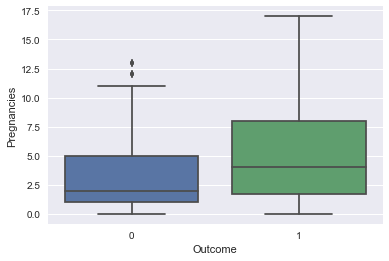

In [241]:
sns.boxplot(x= data['Outcome'],y=data['Pregnancies'])

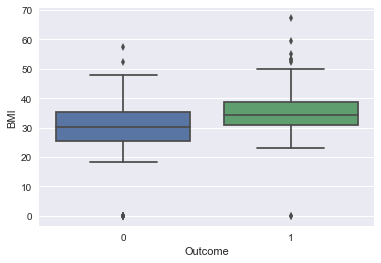

In [242]:
sns.boxplot(x= data['Outcome'],y=data['BMI'])

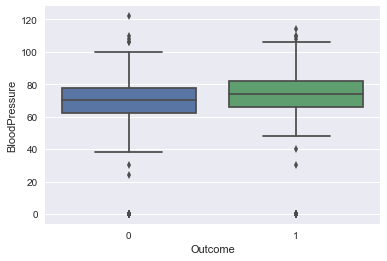

In [243]:
sns.boxplot(x= data['Outcome'],y=data['BloodPressure'])

In [244]:
X_data = data.iloc[:,0:8]
Y_data = data.iloc[:,8]

### Splitting into test train 

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,test_size=.3,random_state=100)

In [246]:
print('Dimension of train X_data : ',X_train.shape)
print('Dimension of train Y_data : ',y_train.shape)
print('Dimension of test X_data : ',X_test.shape)
print('Dimension of test Y_data : ',y_test.shape)

Dimension of train X_data :  (537, 8)
Dimension of train Y_data :  (537,)
Dimension of test X_data :  (231, 8)
Dimension of test Y_data :  (231,)


In [252]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building using keras

#### Importing NN related functions and modules from keras

In [322]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras import optimizers
import keras
np.random.seed(100)

#### Building the Fully connected sequential NN model

In [327]:
model = Sequential()
model.add(Dense(units=15,activation='relu',input_dim=8,name='layer_1'))
#model.add(Dense(units=4,activation='relu'))
#model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid',name='Output_Layer'))

#### Using ADAM optimizer for backward propagation and crossentropy  as a loss function

In [331]:
#ADAM = optimizers.Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### This is how model looks like with 2 layers i.e one hidden layer and the optput layer

In [332]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 15)                135       
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 16        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


#### To create tensorbaord log file

In [333]:
#logger = keras.callbacks.TensorBoard(log_dir='loggg',write_graph=True)

#### Training the model with train dataset

In [342]:
model.fit(x=X_train_scaled,y=y_train,epochs=40,batch_size=15,callbacks=[logger],verbose=2)

Epoch 1/40
 - 0s - loss: 0.4217 - acc: 0.8045
Epoch 2/40
 - 0s - loss: 0.4214 - acc: 0.8063
Epoch 3/40
 - 0s - loss: 0.4214 - acc: 0.8119
Epoch 4/40
 - 0s - loss: 0.4224 - acc: 0.8045
Epoch 5/40
 - 0s - loss: 0.4221 - acc: 0.8082
Epoch 6/40
 - 0s - loss: 0.4214 - acc: 0.8082
Epoch 7/40
 - 0s - loss: 0.4258 - acc: 0.7952
Epoch 8/40
 - 0s - loss: 0.4222 - acc: 0.8119
Epoch 9/40
 - 0s - loss: 0.4219 - acc: 0.8026
Epoch 10/40
 - 0s - loss: 0.4210 - acc: 0.8101
Epoch 11/40
 - 0s - loss: 0.4208 - acc: 0.8119
Epoch 12/40
 - 0s - loss: 0.4206 - acc: 0.8045
Epoch 13/40
 - 0s - loss: 0.4209 - acc: 0.8119
Epoch 14/40
 - 0s - loss: 0.4208 - acc: 0.8045
Epoch 15/40
 - 0s - loss: 0.4202 - acc: 0.8119
Epoch 16/40
 - 0s - loss: 0.4216 - acc: 0.8026
Epoch 17/40
 - 0s - loss: 0.4216 - acc: 0.8045
Epoch 18/40
 - 0s - loss: 0.4204 - acc: 0.8026
Epoch 19/40
 - 0s - loss: 0.4220 - acc: 0.8007
Epoch 20/40
 - 0s - loss: 0.4232 - acc: 0.8045
Epoch 21/40
 - 0s - loss: 0.4213 - acc: 0.8026
Epoch 22/40
 - 0s - lo

#### Training accuracy i.e. accuracy results on training data set

In [343]:
print('Training accuracy : {}'.format(model.evaluate(X_train_scaled,y_train)[1]))

537/537 [==============================] - 0s 42us/step
Training accuracy : 0.8119180628707289


#### Finding the accuracy on test dataset

In [344]:
print('Test set accuracy : {}',format(model.evaluate(X_test_scaled,y_test)[1]))

231/231 [==============================] - 0s 71us/step
Test set accuracy : {} 0.7489177491757777


In [369]:
pred = [round(i[0]) for i in model.predict(X_test_scaled)]
X_test_scaled.shape

(231, 8)

In [346]:
confusion_matrix(y_test,pred,labels=[1,0])

array([[ 46,  35],
       [ 23, 127]])

In [347]:
print('Recall : ',recall_score(y_test,pred,labels=[1,0]))
print('Precision : ',precision_score(y_test,pred,labels=[1,0]))
print('F1 Score : ',f1_score(y_test,pred,labels=[1,0]))

Recall :  0.5679012345679012
Precision :  0.6666666666666666
F1 Score :  0.6133333333333333


In [349]:
model.save('Diabetes_prediction.h5')

In [351]:
m=load_model('Diabetes_prediction.h5')

In [484]:
new_data =np.array([[6,148,72,35,0,33.6,0.627,5]])
new_data.shape

(1, 8)

In [485]:
m.predict((new_data))

array([[1.]], dtype=float32)

# 